In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [87]:
df= pd.read_csv("csv/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


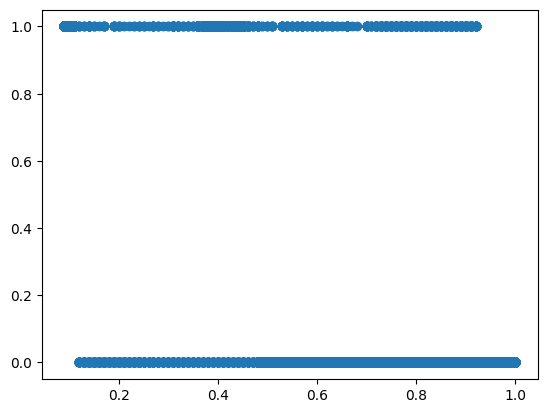

In [88]:
plt.scatter(df["satisfaction_level"],df["left"])

In [89]:
d = {'low':1,'medium':2,'high':3}
df.salary=df.salary.map(d)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


### get unicque selese

In [90]:
unicdep=df.Department.unique()
deparments={unicdep[i]:i+1 for i in range(len(unicdep))}

### conver to int

In [91]:
df.Department=df.Department.map(deparments)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5,1
14995,0.37,0.48,2,160,3,0,1,0,5,1
14996,0.37,0.53,2,143,3,0,1,0,5,1
14997,0.11,0.96,6,280,4,0,1,0,5,1


## plot correlation is emplloyee left or not with all other factore

[]

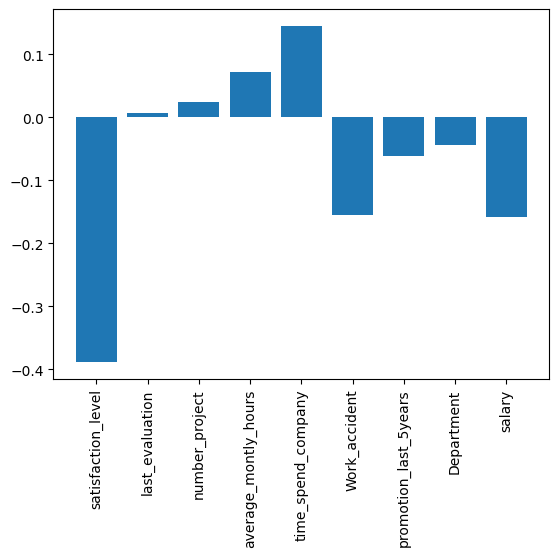

In [92]:
corr=[ df["left"].corr(df[i]) for i in df.columns.drop(["left"]) ]
plt.xticks(rotation=90)
plt.bar(df.columns.drop(["left"]).to_list(),height=corr,)
plt.plot()

## 1. try with 4 col [satisfaction_level,time_spend_company,Work_accident,salary]
## 2. try with all col exept  [last_evaluation,number_project,deparment]
## 3. try with only satisfaction_level
## 4. try with all

### 1.

In [93]:
x=df[["satisfaction_level","time_spend_company","Work_accident","salary"]]
y=df["left"]
print(x)
print(y)

       satisfaction_level  time_spend_company  Work_accident  salary
0                    0.38                   3              0       1
1                    0.80                   6              0       2
2                    0.11                   4              0       2
3                    0.72                   5              0       1
4                    0.37                   3              0       1
...                   ...                 ...            ...     ...
14994                0.40                   3              0       1
14995                0.37                   3              0       1
14996                0.37                   3              0       1
14997                0.11                   4              0       1
14998                0.37                   3              0       1

[14999 rows x 4 columns]
0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
print(len(x_test))
print(len(y_test))

3000
3000


In [95]:
m1=LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [96]:
m1.score(x_test,y_test)

0.7753333333333333

### 2.

In [97]:
x2=df.drop(columns=["last_evaluation","number_project","Department"])
y2=df["left"]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.2)

In [98]:
m2=LogisticRegression()
m2.fit(x2_train,y2_train)
m2.score(x2_test,y2_test)

c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [99]:
m2.score(x2_train,y2_train)

1.0

### 3. only satisfaction_level

In [100]:
x3_train,x3_test,y3_train,y3_test=train_test_split(df[["satisfaction_level"]],df["left"],test_size=.2)
m2=LogisticRegression()
m2.fit(x3_train,y3_train)
m2.score(x3_test,y3_test)

0.7703333333333333

### 4. with all

In [101]:
x4_train,x4_test,y4_train,y4_test=train_test_split(df,df["left"],test_size=.2)
m2=LogisticRegression()
m2.fit(x4_train,y4_train)
m2.score(x4_test,y4_test)

c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [102]:
print(df.shape)
print(x4_test.shape)
print(x4_train.shape)

(14999, 10)
(3000, 10)
(11999, 10)
